In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
columnas = [
    'checking_account',
    'duration',
    'credit_history',
    'purpose',
    'credit_amount',
    'savings_account',
    'employment',
    'installment_rate',
    'personal_status',
    'other_debtors',
    'residence_since',
    'property',
    'age',
    'other_installment',
    'housing',
    'existing_credits',
    'job',
    'people_liable',
    'telephone',
    'foreign_worker',
    'target'
]

In [3]:
df = pd.read_csv('statlog+german+credit+data/german.data', 
                 sep=' ', 
                 names=columnas,
                 header=None)

In [4]:
df.head()

,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment,installment_rate,personal_status,other_debtors,...,property,age,other_installment,housing,existing_credits,job,people_liable,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
checking_account_map = {
    'A11': '< 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '>= 200 DM / salary assignments',
    'A14': 'no checking account'
}

credit_history_map = {
    'A30': 'no credits taken/all paid back duly',
    'A31': 'all credits at this bank paid back duly',
    'A32': 'existing credits paid back duly till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account/other credits existing'
}

purpose_map = {
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A47': 'vacation',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}

savings_account_map = {
    'A61': '< 100 DM',
    'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM',
    'A64': '>= 1000 DM',
    'A65': 'unknown/no savings account'
}

employment_map = {
    'A71': 'unemployed',
    'A72': '< 1 year',
    'A73': '1 <= ... < 4 years',
    'A74': '4 <= ... < 7 years',
    'A75': '>= 7 years'
}

personal_status_map = {
    'A91': 'male: divorced/separated',
    'A92': 'female: divorced/separated/married',
    'A93': 'male: single',
    'A94': 'male: married/widowed',
    'A95': 'female: single'
}

other_debtors_map = {
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor'
}

property_map = {
    'A121': 'real estate',
    'A122': 'building society savings agreement/life insurance',
    'A123': 'car or other',
    'A124': 'unknown/no property'
}

other_installment_map = {
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none'
}

housing_map = {
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for free'
}

job_map = {
    'A171': 'unemployed/unskilled - non-resident',
    'A172': 'unskilled - resident',
    'A173': 'skilled employee/official',
    'A174': 'management/self-employed/highly qualified'
}

telephone_map = {
    'A191': 'none',
    'A192': 'yes, registered under customer name'
}

foreign_worker_map = {
    'A201': 'yes',
    'A202': 'no'
}

In [6]:
df['checking_account'] = df['checking_account'].map(checking_account_map)
df['credit_history'] = df['credit_history'].map(credit_history_map)
df['purpose'] = df['purpose'].map(purpose_map)
df['savings_account'] = df['savings_account'].map(savings_account_map)
df['employment'] = df['employment'].map(employment_map)
df['personal_status'] = df['personal_status'].map(personal_status_map)
df['other_debtors'] = df['other_debtors'].map(other_debtors_map)
df['property'] = df['property'].map(property_map)
df['other_installment'] = df['other_installment'].map(other_installment_map)
df['housing'] = df['housing'].map(housing_map)
df['job'] = df['job'].map(job_map)
df['telephone'] = df['telephone'].map(telephone_map)
df['foreign_worker'] = df['foreign_worker'].map(foreign_worker_map)

df['target'] = df['target'].map({1: 'good', 2: 'bad'})

In [7]:
df['personal_status'] = df['personal_status'].apply(lambda x: 'female' if 'female' in x else 'male')

In [8]:
# Crear grupo A y B
df['group_a'] = df['personal_status'] == 'male'
df['group_b'] = df['personal_status'] == 'female'

In [9]:
df.head()

,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment,installment_rate,personal_status,other_debtors,...,other_installment,housing,existing_credits,job,people_liable,telephone,foreign_worker,target,group_a,group_b
0,< 0 DM,6,critical account/other credits existing,radio/television,1169,unknown/no savings account,>= 7 years,4,male,none,...,none,own,2,skilled employee/official,1,"yes, registered under customer name",yes,good,True,False
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female,none,...,none,own,1,skilled employee/official,1,none,yes,bad,False,True
2,no checking account,12,critical account/other credits existing,education,2096,< 100 DM,4 <= ... < 7 years,2,male,none,...,none,own,1,unskilled - resident,2,none,yes,good,True,False
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male,guarantor,...,none,for free,1,skilled employee/official,2,none,yes,good,True,False
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male,none,...,none,for free,2,skilled employee/official,2,none,yes,bad,True,False


In [10]:
X = df.drop(['target', 'group_a', 'group_b'], axis=1)
y = df['target'].map({'good': 1, 'bad': 0})

In [11]:
# Listar las columnas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

X_encoded = pd.get_dummies(X, columns=categorical_cols)
X = X_encoded


<Axes: >

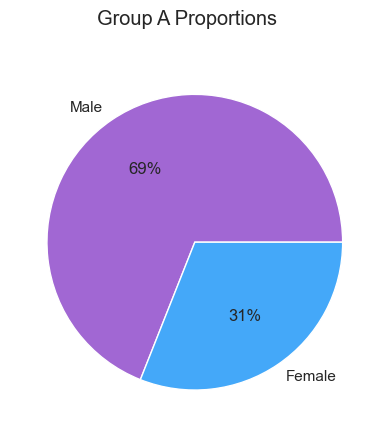

In [12]:
from holisticai.bias.plots import group_pie_plot

group = df['group_a'].replace({True:'Male', False:'Female'})
group_pie_plot(group, title = 'Group A Proportions')

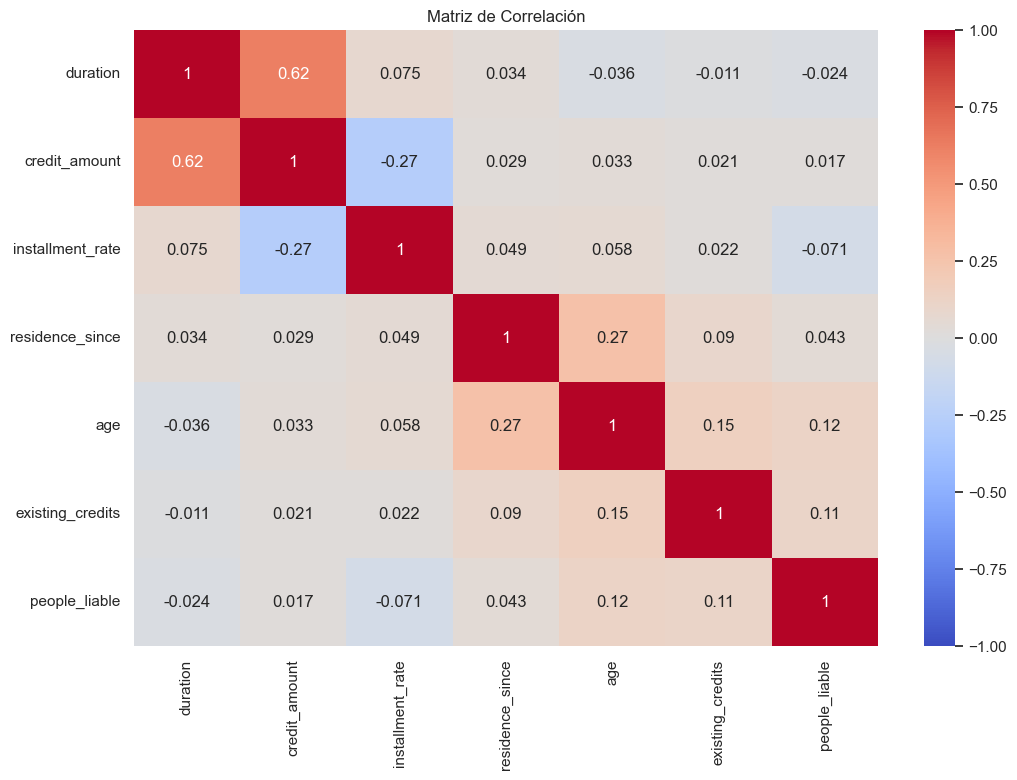

In [13]:
# Matriz de correlación
numerical_cols = X.select_dtypes(include=['number']).columns
correlation_matrix = X[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()


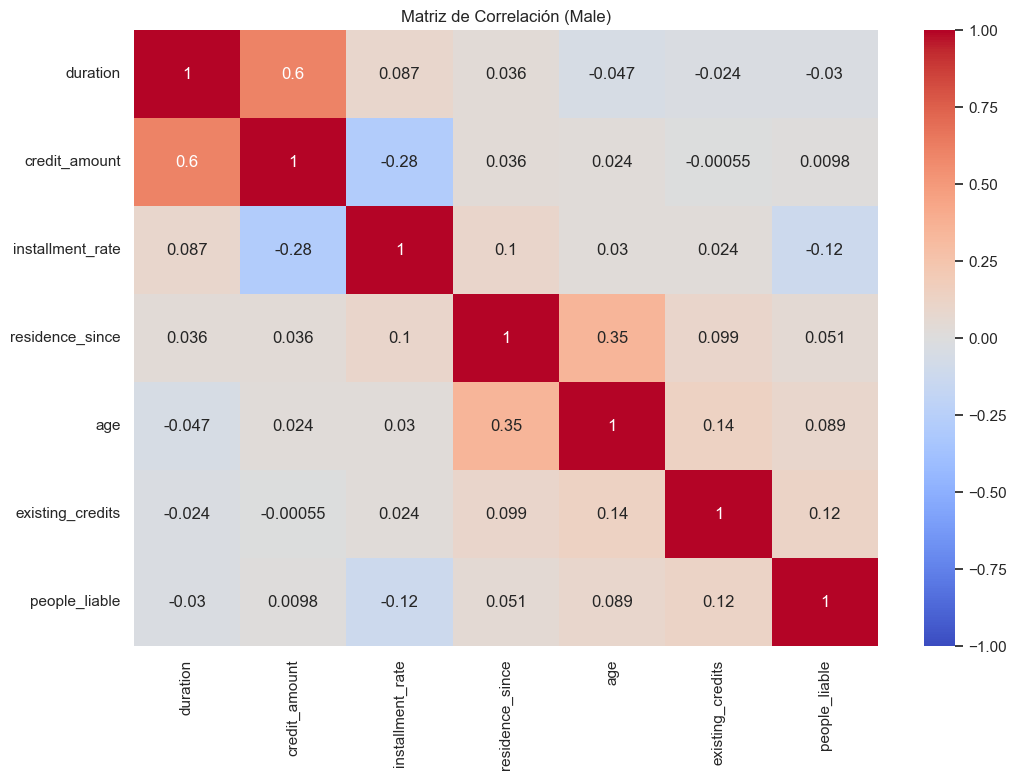

In [14]:
# Filtrar datos para group_a = True (hombres)
X_male = X[df['group_a'] == True]

correlation_matrix = X_male[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación (Male)')
plt.show()


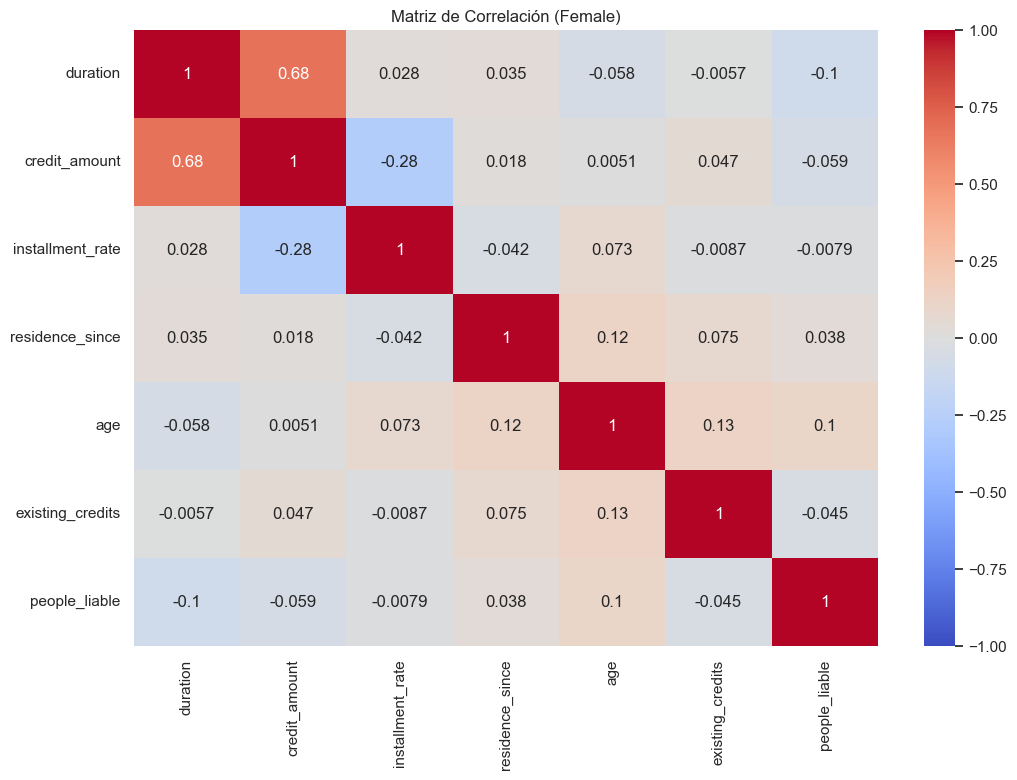

In [15]:
X_female = X[df['group_b'] == True]
correlation_matrix = X_female[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación (Female)')
plt.show()

In [16]:
from holisticai.bias.metrics import classification_bias_metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from holisticai.pipeline import Pipeline
from sklearn.metrics import accuracy_score


from holisticai.bias.mitigation import PrejudiceRemover
from holisticai.bias.mitigation import Reweighing

In [17]:
X['group_a'] = df['group_a']
X['group_b'] = df['group_b']

In [18]:
X_train_grouped, X_test_grouped, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train_grouped.drop(['group_a', 'group_b'], axis=1)
X_test = X_test_grouped.drop(['group_a', 'group_b'], axis=1)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (800, 59)
Testing set shape: (200, 59)


In [19]:
# Define model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Standardize data and fit model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
model.fit(X_train, y_train)

# Predict on test data
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# Get test data with group_a and group_b
test = pd.DataFrame({
    'group_a': X_test_grouped['group_a'],
    'group_b': X_test_grouped['group_b']
}, index=X_test_grouped.index)

# Evaluate bias metrics
baseline = classification_bias_metrics(test['group_a'], test['group_b'], y_pred, y_test, metric_type='both')

# Compute accuracy
baseline_accuracy = accuracy_score(y_test, y_pred)

In [20]:
baseline

,Value,Reference
Metric,,
Statistical Parity,0.001984,0
Disparate Impact,1.002469,1
Four Fifths Rule,0.997537,1
Cohen D,0.005008,0
2SD Rule,0.031799,0
Equality of Opportunity Difference,-0.007541,0
False Positive Rate Difference,0.005602,0
Average Odds Difference,-0.000970,0
Accuracy Difference,-0.001984,0


In [21]:
baseline_accuracy

0.82

# Preprocesamiento

## Rewieghting

In [22]:
# Define preprocessing model
mitigator = Reweighing()
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define pipeline
pipeline = Pipeline(steps=[('scalar', StandardScaler()), ("bm_preprocessing", mitigator), ("estimator", model),])
pipeline.fit(X_train, y_train, bm__group_a=X_train_grouped['group_a'], bm__group_b=X_train_grouped['group_b'])

# Predict
y_pred_pipeline = pipeline.predict(X_test, bm__group_a=X_test_grouped['group_a'], bm__group_b=X_test_grouped['group_b'])

# Evaluate bias metrics for pipeline model
metrics_preprocessing_reweighting = classification_bias_metrics(X_test_grouped['group_a'], X_test_grouped['group_b'], y_pred_pipeline, y_test, metric_type='both')

# Compute accuracy for preprocessing model
accuracy_preprocessing_reweighting = accuracy_score(y_test, y_pred_pipeline)

In [23]:
metrics_preprocessing_reweighting

,Value,Reference
Metric,,
Statistical Parity,0.001984,0
Disparate Impact,1.002469,1
Four Fifths Rule,0.997537,1
Cohen D,0.005008,0
2SD Rule,0.031799,0
Equality of Opportunity Difference,-0.036953,0
False Positive Rate Difference,0.077031,0
Average Odds Difference,0.020039,0
Accuracy Difference,-0.043651,0


In [24]:
accuracy_preprocessing_reweighting

0.79

## Correlation Remover

In [25]:
# Define preprocessing model
from holisticai.bias.mitigation import CorrelationRemover
mitigator = CorrelationRemover()
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define pipeline
pipeline = Pipeline(steps=[('scalar', StandardScaler()), ("bm_preprocessing", mitigator), ("estimator", model),])
pipeline.fit(X_train, y_train, bm__group_a=X_train_grouped['group_a'], bm__group_b=X_train_grouped['group_b'])

# Make predictions
y_pred_pipeline = pipeline.predict(X_test, bm__group_a=X_test_grouped['group_a'], bm__group_b=X_test_grouped['group_b'])

# Evaluate bias metrics for pipeline model
metrics_preprocessing_correlation_remover = classification_bias_metrics(X_test_grouped['group_a'], X_test_grouped['group_b'], y_pred_pipeline, y_test, metric_type='both')

# Compute accuracy for preprocessing model
accuracy_preprocessing_correlation_remover = accuracy_score(y_test, y_pred_pipeline)

In [26]:
metrics_preprocessing_correlation_remover

,Value,Reference
Metric,,
Statistical Parity,-0.013889,0
Disparate Impact,0.984127,1
Four Fifths Rule,0.984127,1
Cohen D,-0.040646,0
2SD Rule,-0.258079,0
Equality of Opportunity Difference,0.012066,0
False Positive Rate Difference,-0.086835,0
Average Odds Difference,-0.037384,0
Accuracy Difference,0.041667,0


In [27]:
accuracy_preprocessing_correlation_remover

0.78

In [28]:
# Comparison table of bias metrics

keys = ['Baseline', 'Preprocessing Mitigator Reweighting', 'Preprocessing Mitigator Correlation Remover']
comparison = pd.concat([baseline['Value'], metrics_preprocessing_reweighting['Value'],metrics_preprocessing_correlation_remover['Value']], axis=1)
comparison.columns = keys

# Add reference column with zeros
comparison['Reference'] = 0
comparison.loc[['Disparate Impact', 'Four Fifths Rule'], 'Reference'] = 1

def highlight_closest(s):
    reference = s['Reference']
    differences = s.drop('Reference').apply(lambda x: abs(x - reference))
    closest = differences.idxmin()
    return ['background-color: mediumseagreen' if x == s[closest] else '' for x in s]

comparison_highlighted = comparison.style.apply(highlight_closest, axis=1)

In [29]:
comparison_highlighted

,Baseline,Preprocessing Mitigator Reweighting,Preprocessing Mitigator Correlation Remover,Reference
Metric,,,,
Statistical Parity,0.001984,0.001984,-0.013889,0
Disparate Impact,1.002469,1.002469,0.984127,1
Four Fifths Rule,0.997537,0.997537,0.984127,1
Cohen D,0.005008,0.005008,-0.040646,0
2SD Rule,0.031799,0.031799,-0.258079,0
Equality of Opportunity Difference,-0.007541,-0.036953,0.012066,0
False Positive Rate Difference,0.005602,0.077031,-0.086835,0
Average Odds Difference,-0.000970,0.020039,-0.037384,0
Accuracy Difference,-0.001984,-0.043651,0.041667,0
